In [10]:
import sys
import os
# setting path
sys.path.append('/work/scripts')
import pandas as pd
import seaborn as sns
import output_utils as ou
import xarray as xr
from glob import glob

In [2]:
cell_y_coord = 0
cell_x_coord = 1

In [50]:
out_dir ='/data/workflows/US-Prr_SWC_SA/'

In [51]:
run_dirs = [d for d in glob(out_dir+'*/', recursive = True) if 'sample' in d]

In [52]:
sample_dfs=[]
for d in run_dirs:
    if 'GPP_monthly_tr.nc' in os.listdir(os.path.join(d, 'output')):
        sample = int(d.split('/')[-2].split('_')[-1])
        
        LWCLAYER = ou.load_trsc_dataframe(var ='LWCLAYER', timeres='monthly', px_y=0, px_x=1, fileprefix=f'{d}output/')[0]
        TLAYER = ou.load_trsc_dataframe(var ='TLAYER', timeres='monthly', px_y=0, px_x=1, fileprefix=f'{d}output/')[0]
        LAYERDEPTH = ou.load_trsc_dataframe(var ='LAYERDEPTH', timeres='monthly', px_y=0, px_x=1, fileprefix=f'{d}output/')[0]
        LAYERDZ = ou.load_trsc_dataframe(var ='LAYERDZ', timeres='monthly', px_y=0, px_x=1, fileprefix=f'{d}output/')[0]
        GPP = ou.load_trsc_dataframe(var ='GPP', timeres='monthly', px_y=0, px_x=1, fileprefix=f'{d}output/')[0][0]
        
        RH = ou.load_trsc_dataframe(var ='RH', timeres='monthly', px_y=0, px_x=1, fileprefix=f'{d}output/')[0][0]

        sample_df = pd.DataFrame({'date': GPP.index, 'sample': [sample]*len(GPP), #'LWCLAYER': LWCLAYER, 'TLAYER': TLAYER, 'LAYERDEPTH': LAYERDEPTH, 'LAYERDZ': LAYERDZ,
                                  'GPP': GPP, 'RH':RH})
        sample_dfs.append(sample_df)
        
sample_dfs=pd.concat(sample_dfs)

Trying to open:  /data/workflows/US-Prr_SWC_SA/sample_000000003//output/LWCLAYER_monthly_tr.nc
Trying to open:  /data/workflows/US-Prr_SWC_SA/sample_000000003//output/TLAYER_monthly_tr.nc
Trying to open:  /data/workflows/US-Prr_SWC_SA/sample_000000003//output/LAYERDEPTH_monthly_tr.nc
Trying to open:  /data/workflows/US-Prr_SWC_SA/sample_000000003//output/LAYERDZ_monthly_tr.nc
Trying to open:  /data/workflows/US-Prr_SWC_SA/sample_000000003//output/GPP_monthly_tr.nc
Trying to open:  /data/workflows/US-Prr_SWC_SA/sample_000000003//output/RH_monthly_tr.nc
Trying to open:  /data/workflows/US-Prr_SWC_SA/sample_000000004//output/LWCLAYER_monthly_tr.nc
Trying to open:  /data/workflows/US-Prr_SWC_SA/sample_000000004//output/TLAYER_monthly_tr.nc
Trying to open:  /data/workflows/US-Prr_SWC_SA/sample_000000004//output/LAYERDEPTH_monthly_tr.nc
Trying to open:  /data/workflows/US-Prr_SWC_SA/sample_000000004//output/LAYERDZ_monthly_tr.nc
Trying to open:  /data/workflows/US-Prr_SWC_SA/sample_000000004

<AxesSubplot:xlabel='date', ylabel='GPP'>

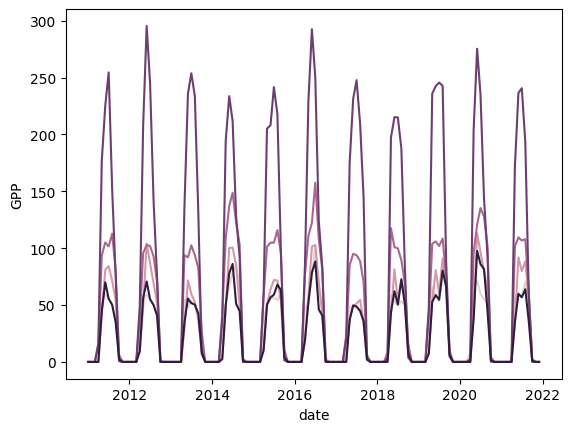

In [53]:
sns.lineplot(data=sample_dfs[sample_dfs['date'].dt.year>2010], x='date', y='GPP', hue='sample', legend=False)

<AxesSubplot:xlabel='date', ylabel='GPP'>

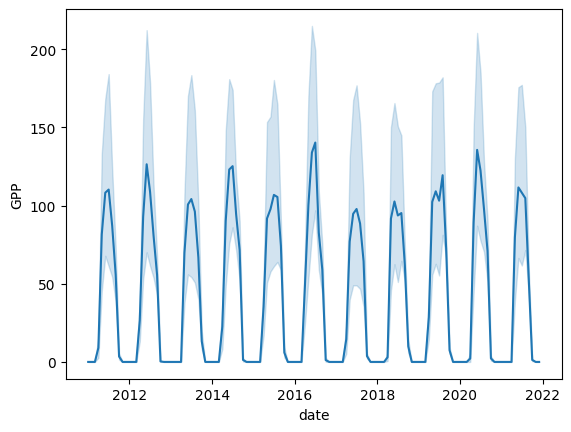

In [54]:
sns.lineplot(data=sample_dfs[sample_dfs['date'].dt.year>2010], x='date', y='GPP')

<AxesSubplot:xlabel='date', ylabel='RH'>

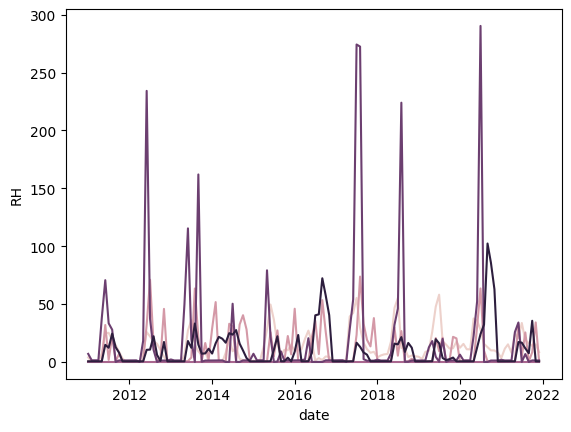

In [55]:
sns.lineplot(data=sample_dfs[sample_dfs['date'].dt.year>2010], x='date', y='RH', hue='sample', legend=False)

<AxesSubplot:xlabel='date', ylabel='RH'>

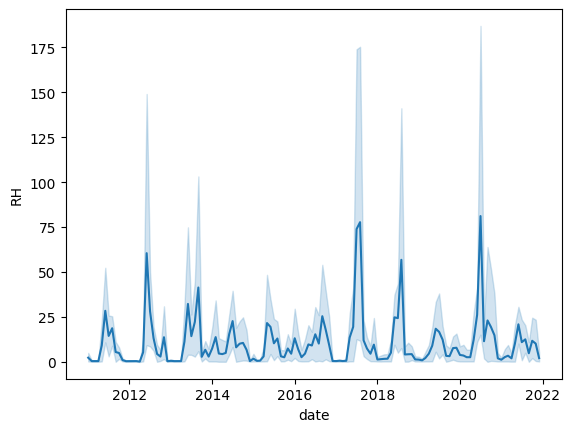

In [56]:
sns.lineplot(data=sample_dfs[sample_dfs['date'].dt.year>2010], x='date', y='RH')